In [79]:
pip install xgboost


You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, f1_score
from sklearn.svm import SVR, LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostRegressor
import numpy as np
import pandas as pd
import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.regularizers import l2
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Linear Regression

In [4]:
df_seta = pd.read_csv("/work/5774-Stress-Strain-Results-20-mm-3KDP.csv")

In [5]:
df_seta.head()


,Time,X-stress-5774,Y-stress-5774,Z-stress-5774,XY-stress-5774,YZ-stress-5774,ZX-stress-5774,Effective Stress (v-m)-5774,Tresca (max shear stress)-5774,Maximum Principal Stress-5774,Minimum Principal Stress-5774,X-strain-5774,Y-strain-5774,Z-strain-5774,XY-strain-5774,YZ-strain-5774,ZX-strain-5774,Effective Strain-5774
0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
1,100.0,-9.940000e-26,-9.920000e-26,-1.030000e-25,2.770000e-29,-2.440000e-28,4.150000e-28,4.210000e-27,0.000000e+00,-2.010000e-25,-2.010000e-25,-1.790000e-26,4.850000e-26,-2.500000e-24,1.680000e-26,-1.490000e-25,2.520000e-25,0.000000
2,200.0,1.150000e-08,1.140000e-08,1.220000e-08,6.290000e-11,-9.510000e-10,6.850000e-08,1.190000e-07,6.850000e-08,8.040000e-08,-5.670000e-08,-5.520000e-08,-6.030000e-08,4.020000e-07,3.820000e-08,-5.780000e-07,4.170000e-05,0.000048
3,300.0,-3.280000e-08,-3.280000e-08,-3.560000e-08,-2.710000e-12,-7.150000e-11,2.350000e-07,4.070000e-07,2.350000e-07,2.010000e-07,-2.690000e-07,3.240000e-07,2.760000e-07,-1.430000e-06,-1.650000e-09,-4.350000e-08,1.430000e-04,0.000165
4,400.0,-7.760000e-09,-7.560000e-09,-8.460000e-09,-2.960000e-11,-1.910000e-10,3.440000e-07,5.950000e-07,3.440000e-07,3.360000e-07,-3.520000e-07,3.730000e-08,1.570000e-07,-3.880000e-07,-1.800000e-08,-1.160000e-07,2.090000e-04,0.000241


In [6]:
y = df_seta["ZX-stress-5774"]
y = y*100000
x = df_seta[[" ZX-strain-5774", "Time"]]
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42, test_size= 0.2)

In [7]:
# Generate Gaussian noise
mean = 0  # Mean of the Gaussian distribution
std_dev = 0.1  # Standard deviation of the Gaussian distribution
noise = np.random.normal(mean, std_dev, size=y.shape)

# Add noise to the data
noisy_data = y + noise

x_train_noise, x_test_noise, y_train_noise, y_test_noise = train_test_split(x,noisy_data, random_state=42, test_size= 0.2)

In [9]:
model_linear = LinearRegression()
model_linear.fit(x_train, y_train)

LinearRegression()

In [12]:
y_pred_linear = model_linear.predict(x_test)

In [15]:
model_linear.coef_

array([4.17980636e-01, 1.76508739e-05])

In [19]:
from sklearn.metrics import r2_score

In [26]:

rmse = mean_squared_error(y_pred_linear, y_test)
r2 = r2_score(y_pred_linear, y_test)
print(rmse)
print(r2)

0.664378400845269
0.7679427501045155


In [30]:
x_test.head()
x_test_time = x_test["Time"]

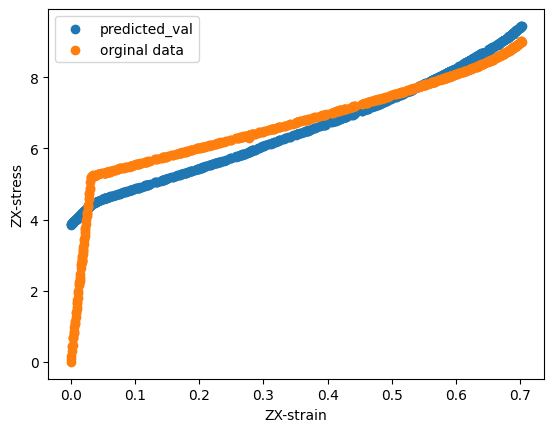

In [31]:

#plt.plot(df_seta["Time"], y)
#plt.plot(df_seta["ZX-strain-7168"],y)
plt.scatter(x_test[" ZX-strain-5774"], y_pred_linear, label = "predicted_val")
plt.scatter(x_test[" ZX-strain-5774"], y_test, label = "orginal data")
plt.legend()
plt.xlabel("ZX-strain")
plt.ylabel("ZX-stress")
plt.show()

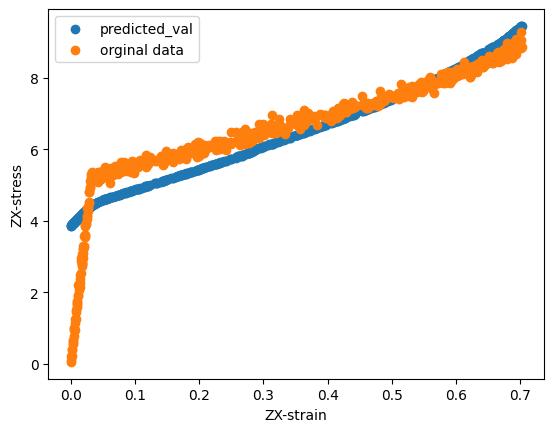

In [32]:
mean = 0  # Mean of the Gaussian distribution
std_dev = 0.1  # Standard deviation of the Gaussian distribution
noise = np.random.normal(mean, std_dev, size=y.shape)

# Add noise to the data
noisy_data = y + noise

x = df_seta[[" ZX-strain-5774", "Time"]]
x_train_noise, x_test_noise, y_train_noise, y_test_noise = train_test_split(x,noisy_data, random_state=42, test_size= 0.2)
model_linear.fit(x_train_noise, y_train_noise)
y_pred_linear_noisy = model_linear.predict(x_test_noise)
plt.scatter(x_test_noise[" ZX-strain-5774"], y_pred_linear_noisy, label = "predicted_val")
plt.scatter(x_test_noise[" ZX-strain-5774"], y_test_noise, label = "orginal data")
plt.legend()
plt.xlabel("ZX-strain")
plt.ylabel("ZX-stress")
plt.show()

In [33]:

rmse = mean_squared_error(y_pred_linear_noisy, y_test)
r2 = r2_score(y_pred_linear_noisy, y_test)
print(rmse)
print(r2)

0.6643732548978396
0.7680537685885244


8 inputs 1 output stress

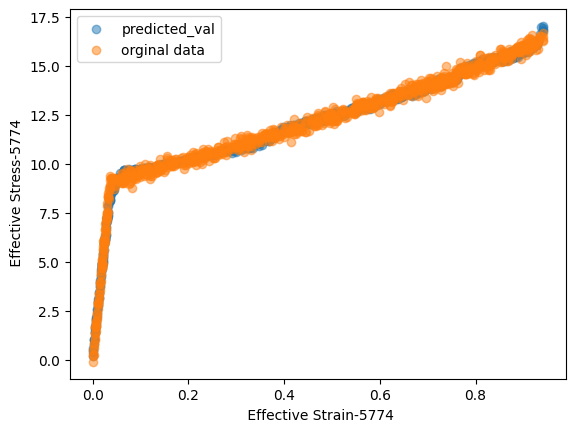

In [34]:
df_set_c = pd.read_csv("/work/5774-Stress-Strain-Results-20-mm-3KDP.csv")
x = df_set_c[["Time", " X-strain-5774", " Y-strain-5774", " Z-strain-5774", " XY-strain-5774", " YZ-strain-5774", " ZX-strain-5774", " Effective Strain-5774"]]
y = df_set_c["Effective Stress (v-m)-5774"]

mean = 0  # Mean of the Gaussian distribution
std_dev = 0.2  # Standard deviation of the Gaussian distribution
noise = np.random.normal(mean, std_dev, size=y.shape)
# Add noise to the data
noisy_data = (y*100000) + noise

x_train_6in, x_test_6in, y_train_6in, y_test_6in = train_test_split(x, noisy_data, random_state= 42, test_size= 0.3)


model_linear.fit(x_train_6in, y_train_6in)

y_pred_linear_noisy = model_linear.predict(x_test_6in)

plt.scatter(x_test_6in[" Effective Strain-5774"], y_pred_linear_noisy, label = "predicted_val", alpha=0.5
)
plt.scatter(x_test_6in[ " Effective Strain-5774"], y_test_6in, alpha = 0.5,label = "orginal data")
plt.legend()
plt.xlabel(" Effective Strain-5774")
plt.ylabel(" Effective Stress-5774")
plt.show()

In [35]:

rmse = mean_squared_error(y_pred_linear_noisy, y_test_6in)
r2 = r2_score(y_pred_linear_noisy, y_test_6in)
print(rmse)
print(r2)

0.06725104905154629
0.9938498111540035


# Polynomial Regression

In [36]:
df = pd.read_csv("/work/5774-Stress-Strain-Results-20-mm-3KDP.csv")
x = df[["Time", " ZX-strain-5774"]]
y = df["ZX-stress-5774"]
y = y*100000

In [38]:
poly_features = PolynomialFeatures(degree = 2)

In [39]:
x_poly = poly_features.fit_transform(x)

In [42]:
x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(x_poly, y, random_state=42, test_size= 0.2)

In [48]:
linear_poly = LinearRegression()

In [49]:
linear_poly.fit(x_train_p, y_train_p)

LinearRegression()

In [51]:
y_pred_p = linear_poly.predict(x_test_p)


In [53]:
mse_p = mean_squared_error(y_pred_p, y_test_p)
r2 = r2_score(y_pred_p, y_test_p)
print(mse_p)
print(r2)

0.010424286291704908
0.9971197340410419


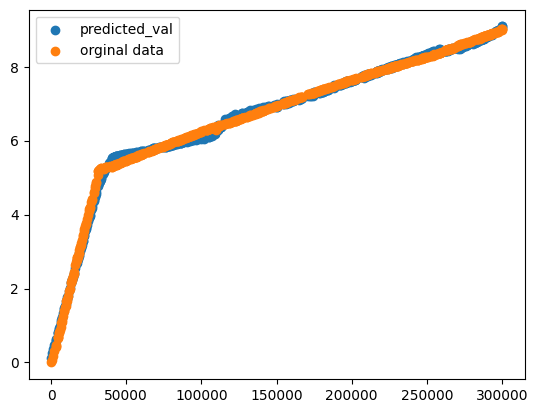

In [55]:
plt.scatter(x_test_p[:,1], y_pred_p , label = "predicted_val")
plt.scatter(x_test_p[:,1], y_test_p, label = "orginal data")
plt.legend()
plt.show()


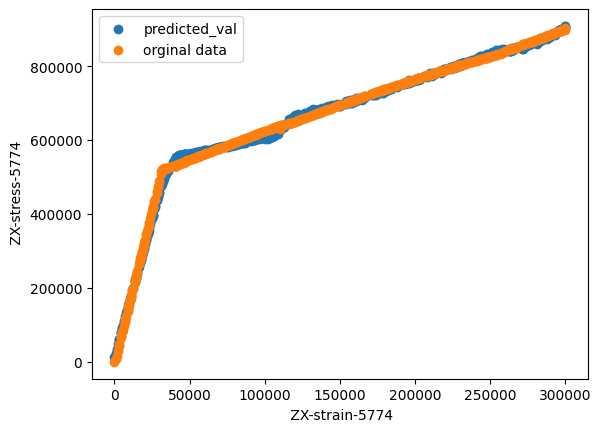

In [56]:
mean = 0  # Mean of the Gaussian distribution
std_dev = 0.1  # Standard deviation of the Gaussian distribution
noise = np.random.normal(mean, std_dev, size=y.shape)

# Add noise to the data
noisy_data = y*100000 + noise

x_train_noise, x_test_noise, y_train_noise, y_test_noise = train_test_split(x_poly,noisy_data, random_state=42, test_size= 0.2)
linear_poly.fit(x_train_noise, y_train_noise)
y_pred_linear_noisy = linear_poly.predict(x_test_noise)
plt.scatter(x_test_noise[:,1], y_pred_linear_noisy, label = "predicted_val")
plt.scatter(x_test_noise[:,1], y_test_noise, label = "orginal data")
plt.legend()

plt.xlabel(" ZX-strain-5774")
plt.ylabel(" ZX-stress-5774")
plt.show()

8 inputs 1 output stress

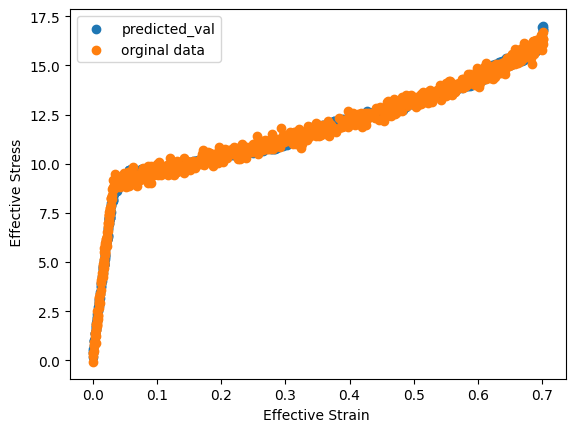

In [57]:
df_set_c = pd.read_csv("/work/5774-Stress-Strain-Results-20-mm-3KDP.csv")
x = df_set_c[["Time", " X-strain-5774", " Y-strain-5774", " Z-strain-5774", " XY-strain-5774", " YZ-strain-5774", " ZX-strain-5774", " Effective Strain-5774"]]
y = df_set_c["Effective Stress (v-m)-5774"]

mean = 0  # Mean of the Gaussian distribution
std_dev = 0.2  # Standard deviation of the Gaussian distribution
noise = np.random.normal(mean, std_dev, size=y.shape)
# Add noise to the data
noisy_data = (y*100000) + noise

x_train_6in, x_test_6in, y_train_6in, y_test_6in = train_test_split(x, noisy_data, random_state= 42, test_size= 0.3)


linear_poly.fit(x_train_6in, y_train_6in)

y_pred_linear_noisy = linear_poly.predict(x_test_6in)

plt.scatter(x_test_6in[" ZX-strain-5774"], y_pred_linear_noisy, label = "predicted_val")
plt.scatter(x_test_6in[ " ZX-strain-5774"], y_test_6in, label = "orginal data")
plt.legend()
plt.xlabel("Effective Strain ")
plt.ylabel(" Effective Stress")
plt.show()

In [58]:
mse_p = mean_squared_error(y_pred_linear_noisy, y_test_6in)
r2 = r2_score(y_pred_linear_noisy, y_test_6in)
print(mse_p)
print(r2)

0.06952777036623081
0.9936641398383361


# Support Vector Regression

In [59]:
df = pd.read_csv("/work/5774-Stress-Strain-Results-20-mm-3KDP.csv")
x_svm = df[["Time", " ZX-strain-5774"]]
y = df["ZX-stress-5774"]
y_svm = y*100000


In [60]:
x_train, x_test, y_train, y_test = train_test_split(x_svm, y_svm, random_state=42, test_size=0.3)

In [61]:
model_svr = SVR()

In [62]:
model_svr.fit(x_train, y_train)

SVR()

In [63]:
y_pred_svr = model_svr.predict(x_test)
y_pred_svr_train = model_svr.predict(x_train)

In [64]:
mse_svr = mean_squared_error(y_pred_svr, y_test)
print(mse_svr)
r2 = r2_score(y_pred_svr, y_test)
print(r2)

0.09942881262254982
0.9674396186002178


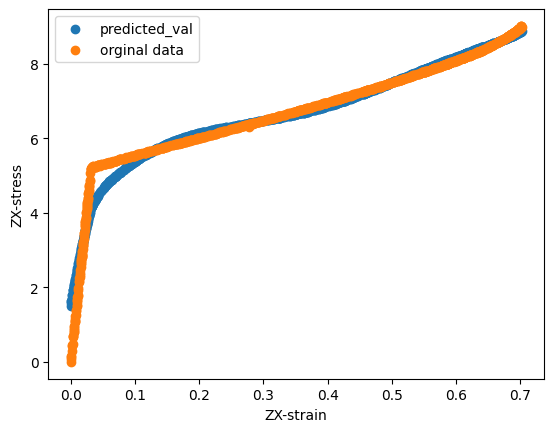

In [65]:
plt.scatter(x_test[" ZX-strain-5774"], y_pred_svr, label = "predicted_val")
plt.scatter(x_test[" ZX-strain-5774"], y_test, label = "orginal data")
plt.legend()
plt.xlabel("ZX-strain")
plt.ylabel("ZX-stress")
plt.show()

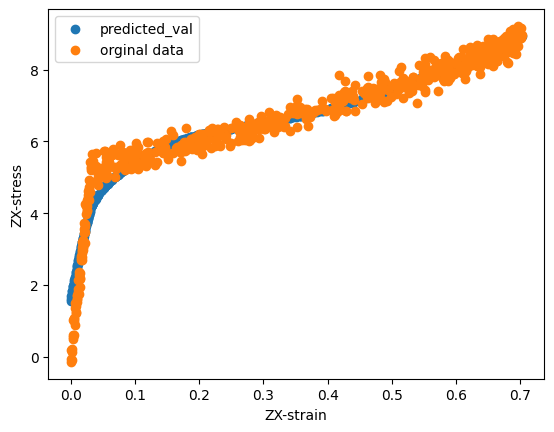

In [66]:
mean = 0  # Mean of the Gaussian distribution
std_dev = 0.2  # Standard deviation of the Gaussian distribution
noise = np.random.normal(mean, std_dev, size=y.shape)

# Add noise to the data
noisy_data = y_svm + noise


x_train_noise, x_test_noise, y_train_noise, y_test_noise = train_test_split(x_svm,noisy_data, random_state=42, test_size= 0.2)
model_svr.fit(x_train_noise, y_train_noise)
y_pred_linear_noisy = model_svr.predict(x_test_noise)
plt.scatter(x_test_noise[" ZX-strain-5774"], y_pred_linear_noisy, label = "predicted_val")
plt.scatter(x_test_noise[" ZX-strain-5774"], y_test_noise, label = "orginal data")
plt.legend()
plt.xlabel("ZX-strain")
plt.ylabel("ZX-stress")
plt.show()

In [67]:
mse_svr = mean_squared_error(y_pred_linear_noisy, y_test_noise)
print(mse_svr)
r2 = r2_score(y_pred_linear_noisy, y_test_noise)
print(r2)

0.166097190325245
0.9479699849423663


In [68]:


# Create a pipeline with standardization, feature selection, and SVR
pipe = Pipeline([('scale', StandardScaler()),
                 ('select', SelectFromModel(SVR(kernel='linear'))),
                 ('svr', SVR())])

# Define the hyperparameters to tune
params_parameters = {'svr__kernel': ['linear', 'rbf', 'poly'],
          'svr__C': [0.01, 0.1, 1, 10, 100],
          'svr__gamma': [0.001, 0.01, 0.1, 1, 'scale', 'auto']}

# Use grid search to find the best hyperparameters
best_parameters = GridSearchCV(pipe, param_grid=params_parameters, cv=3)
best_parameters.fit(x_train, y_train)

# Print the best hyperparameters and the best score
print('Best Hyperparameters:', best_parameters.best_params_)

# Evaluate your SVR model on the test set
y_pred = best_parameters.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Best Hyperparameters: {'svr__C': 100, 'svr__gamma': 1, 'svr__kernel': 'rbf'}
Mean Squared Error: 0.009447421327491958


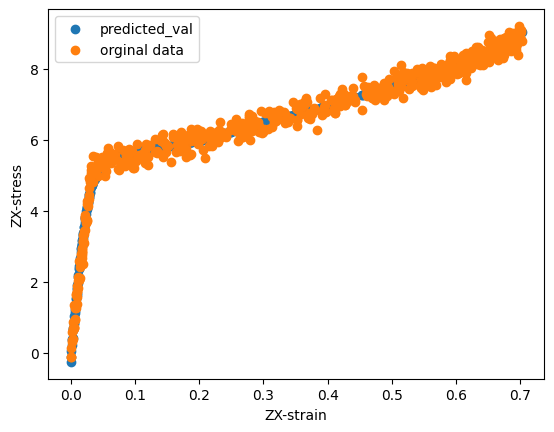

In [69]:
mean = 0  # Mean of the Gaussian distribution
std_dev = 0.2  # Standard deviation of the Gaussian distribution
noise = np.random.normal(mean, std_dev, size=y.shape)

# Add noise to the data
noisy_data = y_svm + noise


x_train_noise, x_test_noise, y_train_noise, y_test_noise = train_test_split(x_svm,noisy_data, random_state=42, test_size= 0.2)
best_parameters.fit(x_train_noise, y_train_noise)
y_pred_linear_noisy = best_parameters.predict(x_test_noise)
plt.scatter(x_test_noise[" ZX-strain-5774"], y_pred_linear_noisy, label = "predicted_val")
plt.scatter(x_test_noise[" ZX-strain-5774"], y_test_noise, label = "orginal data")
plt.legend()
plt.xlabel("ZX-strain")
plt.ylabel("ZX-stress")
plt.show()

In [70]:
mse_svr = mean_squared_error(y_pred_linear_noisy, y_test_noise)
print(mse_svr)
r2 = r2_score(y_pred_linear_noisy, y_test_noise)
print(r2)

0.042416066303737
0.9881612350811892


# 6in 1out

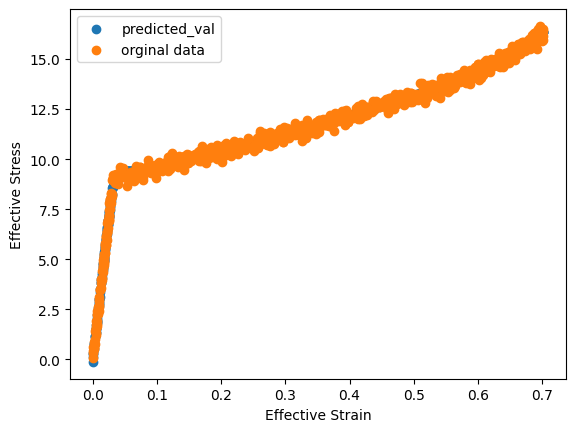

In [72]:
df_set_c = pd.read_csv("/work/5774-Stress-Strain-Results-20-mm-3KDP.csv")
x = df_set_c[["Time", " X-strain-5774", " Y-strain-5774", " Z-strain-5774", " XY-strain-5774", " YZ-strain-5774", " ZX-strain-5774", " Effective Strain-5774"]]
y = df_set_c["Effective Stress (v-m)-5774"]

mean = 0  # Mean of the Gaussian distribution
std_dev = 0.2  # Standard deviation of the Gaussian distribution
noise = np.random.normal(mean, std_dev, size=y.shape)
# Add noise to the data
noisy_data = (y*100000) + noise

x_train_6in, x_test_6in, y_train_6in, y_test_6in = train_test_split(x, noisy_data, random_state= 42, test_size= 0.3)


best_parameters.fit(x_train_6in, y_train_6in)

y_pred_linear_noisy = best_parameters.predict(x_test_6in)

plt.scatter(x_test_6in[" ZX-strain-5774"], y_pred_linear_noisy, label = "predicted_val")
plt.scatter(x_test_6in[ " ZX-strain-5774"], y_test_6in, label = "orginal data")
plt.legend()
plt.xlabel("Effective Strain")
plt.ylabel("Effective Stress")
plt.show()

In [73]:
mse_svr = mean_squared_error(y_pred_linear_noisy, y_test_6in)
print(mse_svr)
r2 = r2_score(y_pred_linear_noisy, y_test_6in)
print(r2)

0.04337192507875885
0.9960573408629866


# XGBOOSTER 

In [90]:

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [97]:
df = pd.read_csv("/work/5774-Stress-Strain-Results-20-mm-3KDP.csv")
x_xg = df[["Time", " ZX-strain-5774"]]
y = df["ZX-stress-5774"]
y_xg = y*100000



In [98]:
x_train, x_test, y_train, y_test = train_test_split(x_xg, y_xg, train_size=0.3, random_state=42)

In [101]:
params = {'objective': 'reg:squarederror', # specify the learning task and the type of objective metric to use
          'learning_rate': 0.1, # controls the step size of the gradient descent algorithm
          'max_depth': 3, # maximum depth of each tree
          'n_estimators': 100, # number of trees in the ensemble
          'subsample': 0.5, # fraction of observations to sample for each tree
          'colsample_bytree': 0.5, # fraction of features to sample for each tree
          'gamma': 0, # minimum loss reduction required to make a further partition on a leaf node of the tree
          'reg_alpha': 0, # L1 regularization term on weights
          'reg_lambda': 1, # L2 regularization term on weights
          'min_child_weight': 1} # minimum sum of instance weight (hessian) needed in a child


model_xgboost = xgb.XGBRegressor(**params)


model_xgboost.fit(x_train, y_train)


y_pred = model_xgboost.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 0.000547653459052496


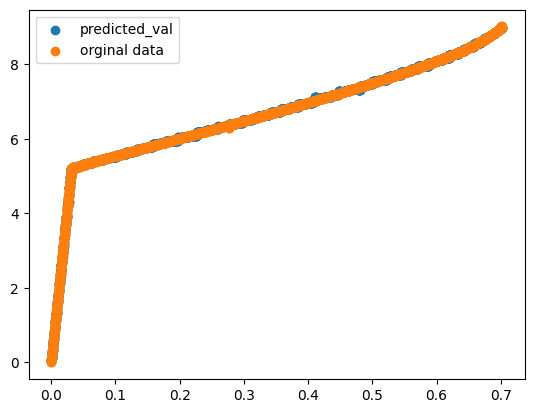

In [102]:
plt.scatter(x_test[" ZX-strain-5774"], y_pred, label = "predicted_val")
plt.scatter(x_test[" ZX-strain-5774"], y_test, label = "orginal data")
plt.legend()
plt.show()

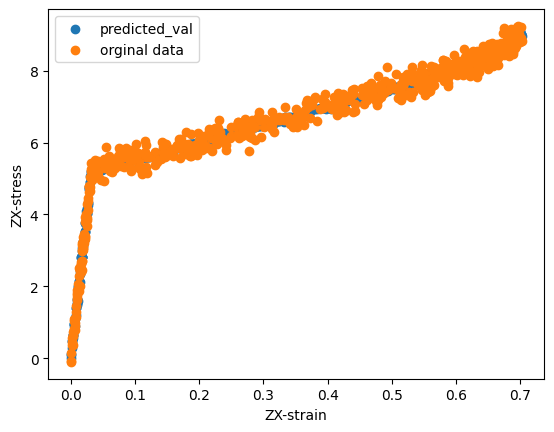

In [103]:
mean = 0  # Mean of the Gaussian distribution
std_dev = 0.2  # Standard deviation of the Gaussian distribution
noise = np.random.normal(mean, std_dev, size=y.shape)

# Add noise to the data
noisy_data = y_xg + noise


x_train_noise, x_test_noise, y_train_noise, y_test_noise = train_test_split(x_xg,noisy_data, random_state=42, test_size= 0.2)
model_xgboost.fit(x_train_noise, y_train_noise)
y_pred_linear_noisy = model_xgboost.predict(x_test_noise)
plt.scatter(x_test_noise[" ZX-strain-5774"], y_pred_linear_noisy, label = "predicted_val")
plt.scatter(x_test_noise[" ZX-strain-5774"], y_test_noise, label = "orginal data")
plt.legend()
plt.xlabel("ZX-strain")
plt.ylabel("ZX-stress")
plt.show()

In [104]:
from sklearn.metrics import r2_score

In [105]:
mse_svr = mean_squared_error(y_pred_linear_noisy, y_test_noise)
print(mse_svr)
r2 = r2_score(y_pred_linear_noisy, y_test_noise)
print(r2)

0.04405268088886092
0.987896437105366


# 6in 1 out

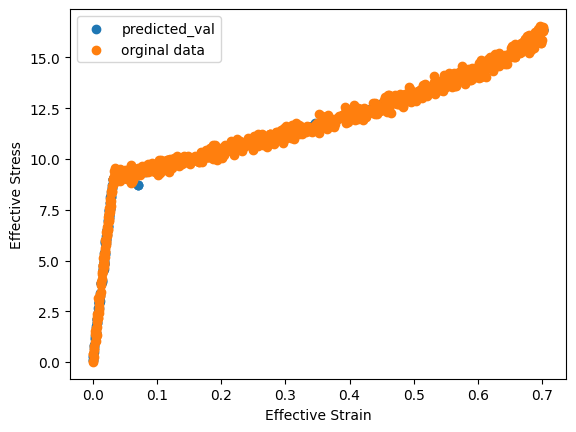

In [106]:
df_set_c = pd.read_csv("/work/5774-Stress-Strain-Results-20-mm-3KDP.csv")
x = df_set_c[["Time", " X-strain-5774", " Y-strain-5774", " Z-strain-5774", " XY-strain-5774", " YZ-strain-5774", " ZX-strain-5774", " Effective Strain-5774"]]
y = df_set_c["Effective Stress (v-m)-5774"]

mean = 0  # Mean of the Gaussian distribution
std_dev = 0.2  # Standard deviation of the Gaussian distribution
noise = np.random.normal(mean, std_dev, size=y.shape)
# Add noise to the data
noisy_data = (y*100000) + noise

x_train_6in, x_test_6in, y_train_6in, y_test_6in = train_test_split(x, noisy_data, random_state= 42, test_size= 0.3)


model_xgboost.fit(x_train_6in, y_train_6in)

y_pred_linear_noisy = model_xgboost.predict(x_test_6in)

plt.scatter(x_test_6in[" ZX-strain-5774"], y_pred_linear_noisy, label = "predicted_val")
plt.scatter(x_test_6in[ " ZX-strain-5774"], y_test_6in, label = "orginal data")
plt.legend()
plt.xlabel("Effective Strain")
plt.ylabel("Effective Stress")
plt.show()

In [107]:
mse_svr = mean_squared_error(y_pred_linear_noisy, y_test_6in)
print(mse_svr)
r2 = r2_score(y_pred_linear_noisy, y_test_6in)
print(r2)

0.04430006540917133
0.9959656844046095


# linear regression for 6 input one output

In [108]:
df_set_c = pd.read_csv("/work/5774-Stress-Strain-Results-20-mm-3KDP.csv")
x = df_set_c[["Time", " X-strain-5774", " Y-strain-5774", " Z-strain-5774", " XY-strain-5774", " YZ-strain-5774", " ZX-strain-5774", " Effective Strain-5774"]]
y = df_set_c["Effective Stress (v-m)-5774"]
x_train_6in, x_test_6in, y_train_6in, y_test_6in = train_test_split(x, y, random_state= 42, test_size= 0.3)
y_train_6in = y_train_6in*100000
y_test_6in = y_test_6in*100000
y_train_6in = np.array(y_train_6in)
y_test_6in = np.array(y_test_6in)
y_train_6in.reshape(-1,1)
y_test_6in.reshape(-1,1)

array([[15.6  ],
       [13.8  ],
       [11.9  ],
       [ 7.1  ],
       [14.8  ],
       [13.8  ],
       [11.9  ],
       [12.5  ],
       [ 9.18 ],
       [14.5  ],
       [15.5  ],
       [ 1.41 ],
       [ 9.86 ],
       [13.2  ],
       [15.6  ],
       [10.6  ],
       [13.1  ],
       [ 9.39 ],
       [11.   ],
       [14.9  ],
       [ 1.18 ],
       [ 8.18 ],
       [10.6  ],
       [13.7  ],
       [11.7  ],
       [15.2  ],
       [12.3  ],
       [14.9  ],
       [ 8.41 ],
       [11.4  ],
       [10.8  ],
       [13.7  ],
       [10.1  ],
       [13.9  ],
       [ 8.25 ],
       [10.2  ],
       [14.2  ],
       [ 9.04 ],
       [ 8.46 ],
       [11.6  ],
       [ 5.43 ],
       [ 1.68 ],
       [ 9.2  ],
       [10.1  ],
       [12.3  ],
       [14.7  ],
       [14.6  ],
       [ 0.293],
       [16.3  ],
       [11.7  ],
       [11.1  ],
       [14.2  ],
       [ 5.73 ],
       [11.4  ],
       [ 4.27 ],
       [13.2  ],
       [11.7  ],
       [10.2  ],
       [15.3  

In [109]:
np.shape(df_set_c)

(3002, 18)

In [110]:
linear_6_input = LinearRegression()

In [111]:
linear_6_input.fit(x_train_6in, y_train_6in)

LinearRegression()

In [112]:
linear_6_input.coef_

array([ 3.57143184e-04, -3.61095072e+01,  3.79290579e+04, -1.60830654e+01,
        1.11897536e+03, -7.12313221e+02,  4.73793790e-01, -8.76819023e+01])

In [113]:
y_pred_6_in = linear_6_input.predict(x_test_6in)

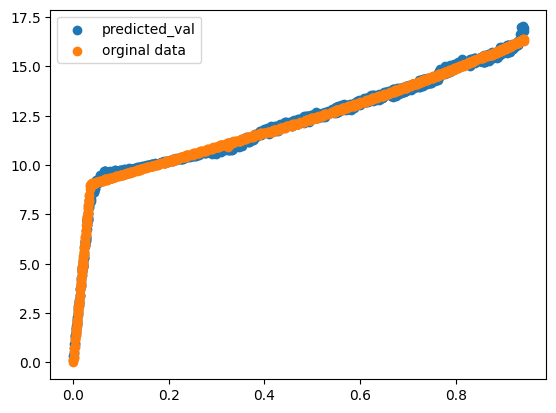

In [114]:

plt.scatter(x_test_6in[" Effective Strain-5774"], y_pred_6_in, label = "predicted_val")
plt.scatter(x_test_6in[" Effective Strain-5774"], y_test_6in, label = "orginal data")
plt.legend()
plt.show()

In [115]:
rmse = mean_squared_error(y_pred_6_in,y_test_6in )
r2 = r2_score(y_pred_6_in,y_test_6in)
print(rmse)
print(r2)

0.028567652957810066
0.9973963342422252


# Lasso

In [116]:
lasso = Lasso(alpha=0.1)

# Fit the model to the data
lasso.fit(x_train_6in, y_train_6in)

# Get the coefficients of the model
coefficients = lasso.coef_

In [117]:
x_train_6in.head()

,Time,X-strain-5774,Y-strain-5774,Z-strain-5774,XY-strain-5774,YZ-strain-5774,ZX-strain-5774,Effective Strain-5774
530,53000.0,0.002330,0.000009,-0.002310,-2.960000e-05,0.000127,0.09340,0.10800
1741,174000.0,0.123000,0.000027,-0.123000,-6.220000e-05,-0.000282,0.46200,0.55200
49,4900.0,-0.000017,0.000002,0.000012,4.280000e-08,0.000018,0.00463,0.00535
2992,299000.0,0.414000,0.000005,-0.414000,-4.540000e-04,-0.000870,0.70100,0.94000
1011,101000.0,0.031100,0.000019,-0.031100,4.870000e-05,0.000040,0.25200,0.29300


In [118]:
coefficients

array([ 3.51035893e-05, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00])

In [119]:
y_pred = lasso.predict(x_test_6in)

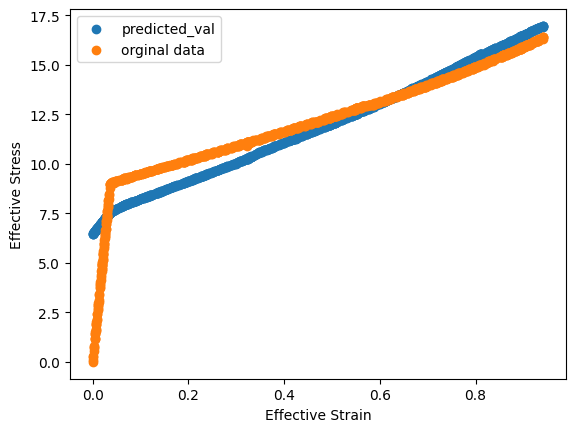

In [120]:
plt.scatter(x_test_6in[" Effective Strain-5774"], y_pred, label = "predicted_val")
plt.scatter(x_test_6in[" Effective Strain-5774"], y_test_6in, label = "orginal data")
plt.legend()
plt.xlabel("Effective Strain")
plt.ylabel("Effective Stress")
plt.show()

In [121]:
rmse = mean_squared_error(y_pred,y_test_6in )
r2 = r2_score(y_pred,y_test_6in)
print(rmse)
print(r2)

1.6112320231869228
0.8345429140267513


# Ridge

In [122]:
ridge = Ridge(alpha=0.1)

# Fit the model to the training data
ridge.fit(x_train_6in, y_train_6in)

# Get the coefficients of the model
coefficients = ridge.coef_

# Make predictions using the trained model


In [123]:
y_pred = ridge.predict(x_test_6in)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test_6in, y_pred)

print("Ridge regression coefficients:", coefficients)
print("Mean squared error:", mse)

Ridge regression coefficients: [ 2.75107408e-04 -1.91674713e+01  4.87583032e-02  1.90296389e+01
  4.77057396e-02  2.95914367e-01 -2.72201037e+01 -3.51215543e+01]
Mean squared error: 0.1311512762552608


In [124]:
rmse = mean_squared_error(y_pred,y_test_6in )
r2 = r2_score(y_pred,y_test_6in)
print(rmse)
print(r2)

0.1311512762552608
0.9878185409259002


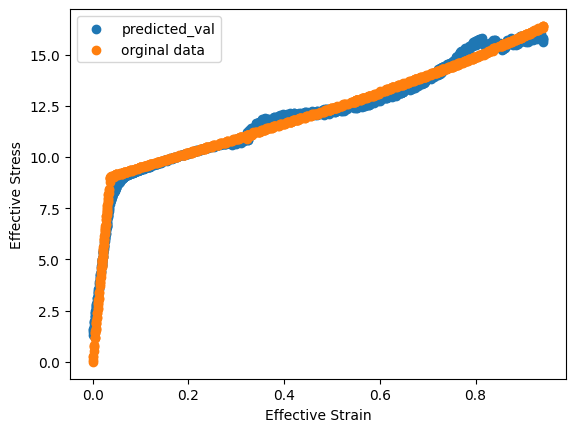

In [125]:
plt.scatter(x_test_6in[" Effective Strain-5774"], y_pred, label = "predicted_val")
plt.scatter(x_test_6in[" Effective Strain-5774"], y_test_6in, label = "orginal data")
plt.legend()
plt.xlabel("Effective Strain")
plt.ylabel("Effective Stress")
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=60ead638-8f81-43ec-aaad-b2a28fdb9937' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>